### Analysis of ecDNA Counts Across Groups and Timelines

##### This notebook performs an exploratory and statistical analysis on ecDNA count data.

We:
- Load and inspect the dataset.
- Explore data distribution and check for normality.
- Perform nonparametric tests (Kruskal–Wallis, Dunn's test, and Mann–Whitney U test) to compare groups and timelines.
- Visualize the results using boxplots annotated with significance symbols.

*Note:* Nonparametric tests are used because the ecDNA counts are not normally distributed.


### 1. Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Statistical tests
from scipy.stats import kruskal, mannwhitneyu
import scikit_posthocs as sp

# For nicer plots and suppressing warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")
%matplotlib inline

## Load Dataset

In [2]:
# Update the path below to the location of your CSV file.
data_path = r"/proj/brunk_ecdna_cv_project/Poorya/FACS-FISH_redistribution_NCIH2170/version_2_Acc_87/5_Final_analysis/Boxplots/FInal_result.csv"
df = pd.read_csv(data_path, index_col=False)

In [3]:
# Quick inspection of data
print("Data Head:")
display(df.head())

Data Head:


,filename,folder,Group,Timeline,ecDNA,MIA_total
0,H2170_HIGH_HER2_G1_2501_1_Merge.tif,FACS_241119,High,G1,180,99
1,H2170_LOW_HER2_G2_2502_11_Merge.tif,FACS_241119,Low,G2,102,101
2,H2170_LOW_HER2_G0_2411_80_Merge.tif,FACS_241119,Low,G0,103,44
3,H2170_TOTAL_HER2_G1_2501_55_Merge.tif,FACS_241119,Post sort control,G1,250,90
4,H2170_LOW_HER2_G2_2502_8_Merge.tif,FACS_241119,Low,G2,221,67


In [4]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   3170 non-null   object
 1   folder     3170 non-null   object
 2   Group      3170 non-null   object
 3   Timeline   3170 non-null   object
 4   ecDNA      3170 non-null   int64 
 5   MIA_total  3170 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 148.7+ KB


In [5]:
print("\nDescriptive Statistics for Numeric Columns:")
display(df[['ecDNA', 'MIA_total']].describe())


Descriptive Statistics for Numeric Columns:


,ecDNA,MIA_total
count,3170.000000,3170.000000
mean,246.442271,154.586751
std,152.782810,141.982386
min,24.000000,2.000000
25%,136.000000,56.000000
50%,212.000000,106.000000
75%,319.000000,209.000000
max,1370.000000,942.000000


### 3. Data Preprocessing

#### We define custom orders for the "Group" and "Timeline" variables and convert them to categorical types.
#### This ensures consistent ordering in plots and analysis.

In [6]:
# Define custom orders:
group_order = ["Pre sort control", "Low", "High", "Post sort control"]
timeline_order = ["G0", "G1", "G2", "G9"]

# Convert to ordered categorical types
df["Group"] = pd.Categorical(df["Group"], categories=group_order, ordered=True)
df["Timeline"] = pd.Categorical(df["Timeline"], categories=timeline_order, ordered=True)

print("Unique Groups:", df["Group"].unique())


Unique Groups: ['High', 'Low', 'Post sort control', 'Pre sort control']
Categories (4, object): ['Pre sort control' < 'Low' < 'High' < 'Post sort control']


### 4. Exploratory Data Analysis: Distribution and Normality Check

In [7]:
df.groupby(["Timeline", "Group"])["ecDNA"].describe()

count        mean         std   min     25%  \
Timeline Group                                                            
G0       Pre sort control   150.0  329.773333  167.348054  92.0  203.50   
         Low                267.0  145.651685   78.900494  25.0   89.50   
         High               263.0  271.034221  175.394046  44.0  146.50   
         Post sort control  272.0  257.488971  141.917339  63.0  153.50   
G1       Pre sort control   150.0  329.773333  167.348054  92.0  203.50   
         Low                210.0  160.233333  102.948484  31.0   87.00   
         High               263.0  273.296578  176.749282  50.0  147.00   
         Post sort control  264.0  200.318182  106.271645  31.0  130.00   
G2       Pre sort control   150.0  329.773333  167.348054  92.0  203.50   
         Low                265.0  207.939623  120.491466  37.0  130.00   
         High               274.0  264.682482  139.094894  41.0  165.25   
         Post sort control  269.0  257.007435  139.531599  34.0  154.00   
G9       Pre sort control   150.0  329.773333  167.348054  92.0  203.50   
         Low                122.0  219.786885  140.881125  31.0  113.25   
         High               101.0  209.544554  137.187866  24.0  114.00   

                              50%     75%     max  
Timeline Group                                     
G0       Pre sort control   295.5  434.00   942.0  
         Low                126.0  183.00   478.0  
         High               233.0  330.50  1370.0  
         Post sort control  217.5  332.25   852.0  
G1       Pre sort control   295.5  434.00   942.0  
         Low                135.0  212.50   763.0  
         High               228.0  352.00  1113.0  
         Post sort control  179.0  251.25   606.0  
G2       Pre sort control   295.5  434.00   942.0  
         Low                174.0  259.00   711.0  
         High               245.0  338.25   784.0  
         Post sort control  229.0  326.00   706.0  
G9       Pre sort control   295.5  434.00   942.0  
         Low                206.5  278.50   898.0  
         High               161.0  287.00   677.0

In [8]:
df.groupby([ "Group", "Timeline"])["ecDNA"].describe()

count        mean         std   min     25%  \
Group             Timeline                                                
Pre sort control  G0        150.0  329.773333  167.348054  92.0  203.50   
                  G1        150.0  329.773333  167.348054  92.0  203.50   
                  G2        150.0  329.773333  167.348054  92.0  203.50   
                  G9        150.0  329.773333  167.348054  92.0  203.50   
Low               G0        267.0  145.651685   78.900494  25.0   89.50   
                  G1        210.0  160.233333  102.948484  31.0   87.00   
                  G2        265.0  207.939623  120.491466  37.0  130.00   
                  G9        122.0  219.786885  140.881125  31.0  113.25   
High              G0        263.0  271.034221  175.394046  44.0  146.50   
                  G1        263.0  273.296578  176.749282  50.0  147.00   
                  G2        274.0  264.682482  139.094894  41.0  165.25   
                  G9        101.0  209.544554  137.187866  24.0  114.00   
Post sort control G0        272.0  257.488971  141.917339  63.0  153.50   
                  G1        264.0  200.318182  106.271645  31.0  130.00   
                  G2        269.0  257.007435  139.531599  34.0  154.00   

                              50%     75%     max  
Group             Timeline                         
Pre sort control  G0        295.5  434.00   942.0  
                  G1        295.5  434.00   942.0  
                  G2        295.5  434.00   942.0  
                  G9        295.5  434.00   942.0  
Low               G0        126.0  183.00   478.0  
                  G1        135.0  212.50   763.0  
                  G2        174.0  259.00   711.0  
                  G9        206.5  278.50   898.0  
High              G0        233.0  330.50  1370.0  
                  G1        228.0  352.00  1113.0  
                  G2        245.0  338.25   784.0  
                  G9        161.0  287.00   677.0  
Post sort control G0        217.5  332.25   852.0  
                  G1        179.0  251.25   606.0  
                  G2        229.0  326.00   706.0

## Check Normality

### We use a FacetGrid to display histograms (with KDE overlays) of the ecDNA counts by Group and Timeline.

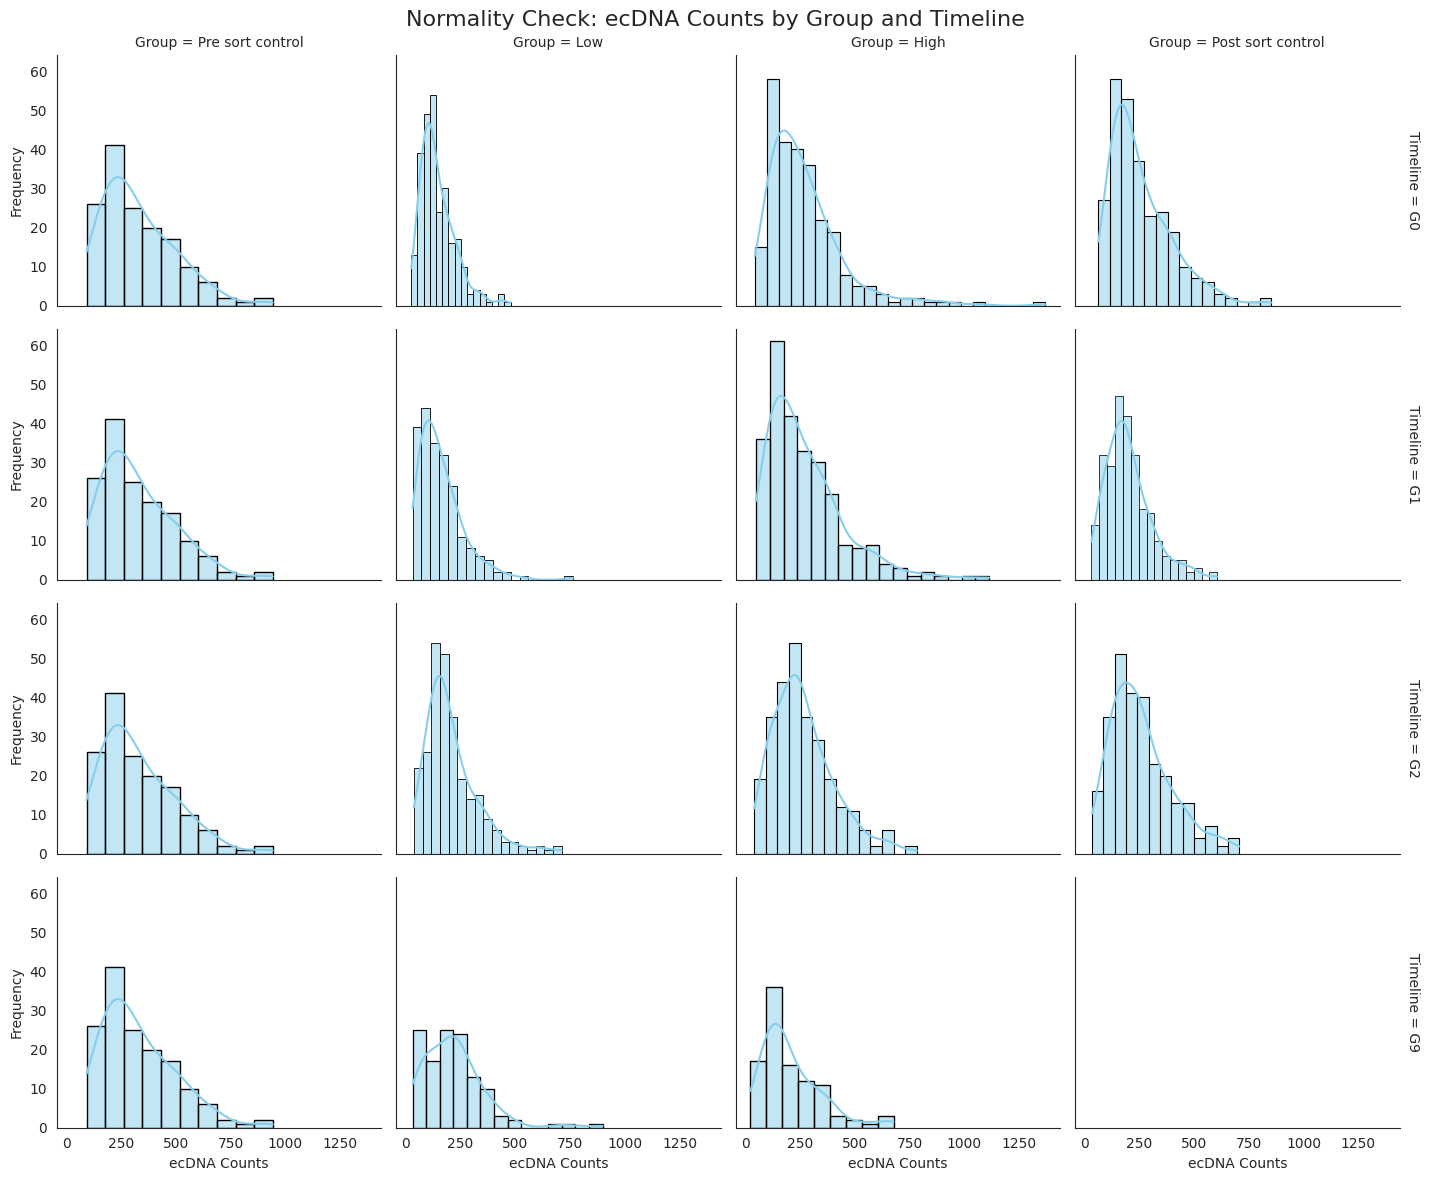

In [9]:
# Set up FacetGrid
sns.set_style("white")

g = sns.FacetGrid(df, row="Timeline", col="Group", margin_titles=True, height=3, aspect=1.2)

# Map histograms to grid
g.map(sns.histplot, "ecDNA", kde=True, color='skyblue' , edgecolor='black')

g.set_axis_labels("ecDNA Counts", "Frequency")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Normality Check: ecDNA Counts by Group and Timeline', fontsize=16)

plt.tight_layout()
plt.savefig('Histogram of ecDNA Counts by Group and Timeline.svg', format='svg', bbox_inches='tight')
plt.show()

### Define function for significance annotation

### 5. Helper Function for Significance Annotation

In [10]:
def get_significance_symbol(p_value):
    if p_value < 0.0001:
        return '****'
    elif p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'

### 6. Statistical Tests: Comparing Groups Within Each Timeline

### Run Kruskal-Wallis and Dunn's test (by groups within each timeline)

##### For each timeline (excluding the "Pre sort control" group), we perform a Kruskal–Wallis test.
##### If the test is significant, we follow up with Dunn's post hoc test (Bonferroni-adjusted).


In [11]:
# Exclude Pre sort control from statistics
stat_df = df[df['Group'] != 'Pre sort control']

for timeline in timeline_order:
    print(f"\nTimeline: {timeline}")
    subset = stat_df[stat_df['Timeline'] == timeline]
    groups = subset['Group'].unique()
    
    data_groups = [subset[subset['Group']==g]['ecDNA'] for g in groups]
    
    # Kruskal-Wallis Test
    stat, p_kw = kruskal(*data_groups)
    print(f"Kruskal-Wallis p-value: {p_kw}")

    if p_kw < 0.05:
        dunn_results = sp.posthoc_dunn(subset, val_col='ecDNA', group_col='Group', p_adjust='bonferroni')
        print(dunn_results)
        dunn_results.to_csv(f"dunn_groups_{timeline}.csv")
    else:
        print("No significant differences found between groups.")



Timeline: G0
Kruskal-Wallis p-value: 5.7865500932344045e-36
                            Low          High  Post sort control
Low                1.000000e+00  2.023350e-28       3.178326e-27
High               2.023350e-28  1.000000e+00       1.000000e+00
Post sort control  3.178326e-27  1.000000e+00       1.000000e+00

Timeline: G1
Kruskal-Wallis p-value: 4.436675496032767e-17
                            Low          High  Post sort control
Low                1.000000e+00  1.280699e-17           0.000017
High               1.280699e-17  1.000000e+00           0.000034
Post sort control  1.659131e-05  3.420635e-05           1.000000

Timeline: G2
Kruskal-Wallis p-value: 5.690211477764796e-08
                            Low          High  Post sort control
Low                1.000000e+00  2.183227e-07           0.000018
High               2.183227e-07  1.000000e+00           1.000000
Post sort control  1.781506e-05  1.000000e+00           1.000000

Timeline: G9
Kruskal-Wallis p-value: 0

### 7. Visualization: Boxplots with Significance Annotations (Groups Within Each Timeline)

#### For each timeline, we create a boxplot (with overlaid swarmplot) showing ecDNA counts across groups.
#### We annotate the plots with significance symbols from Dunn’s test.

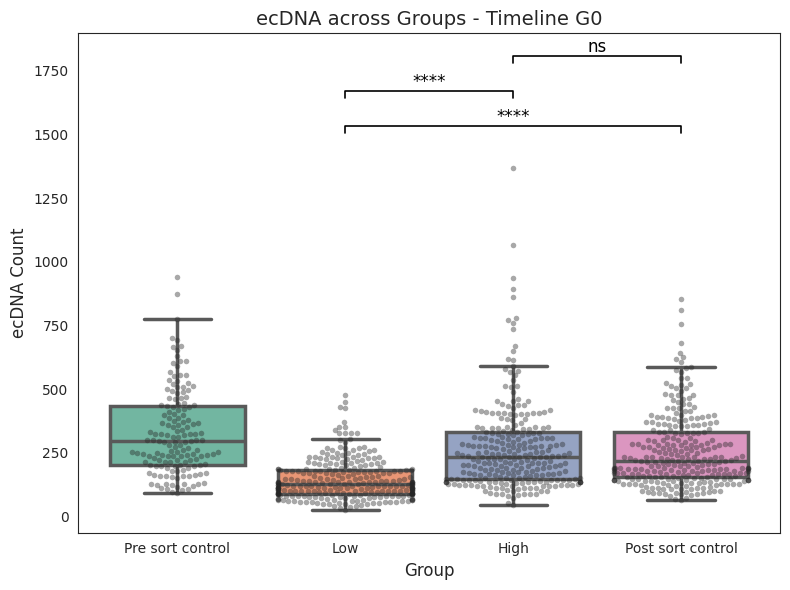

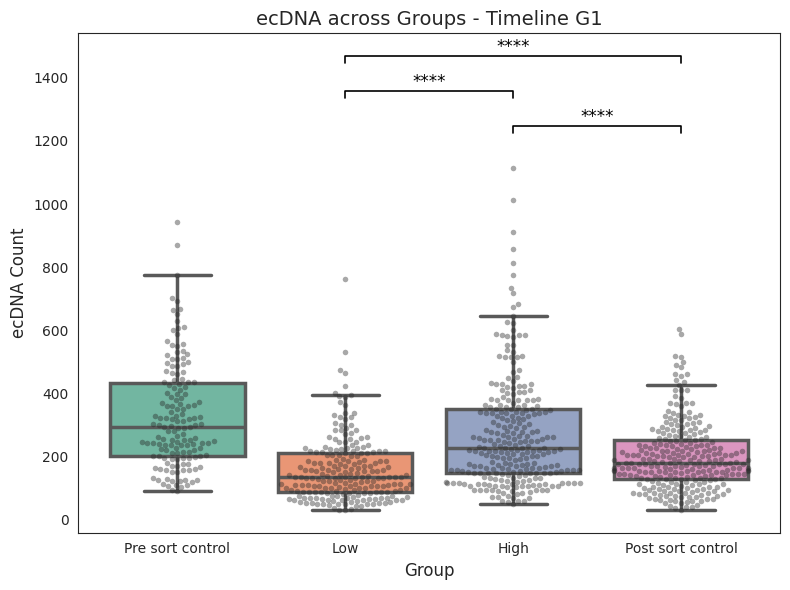

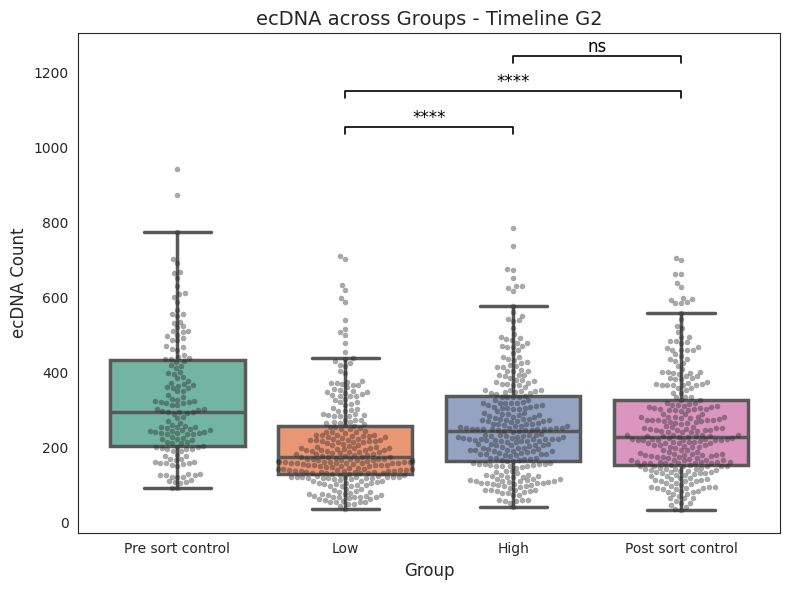

No overall significant differences at timeline G9.


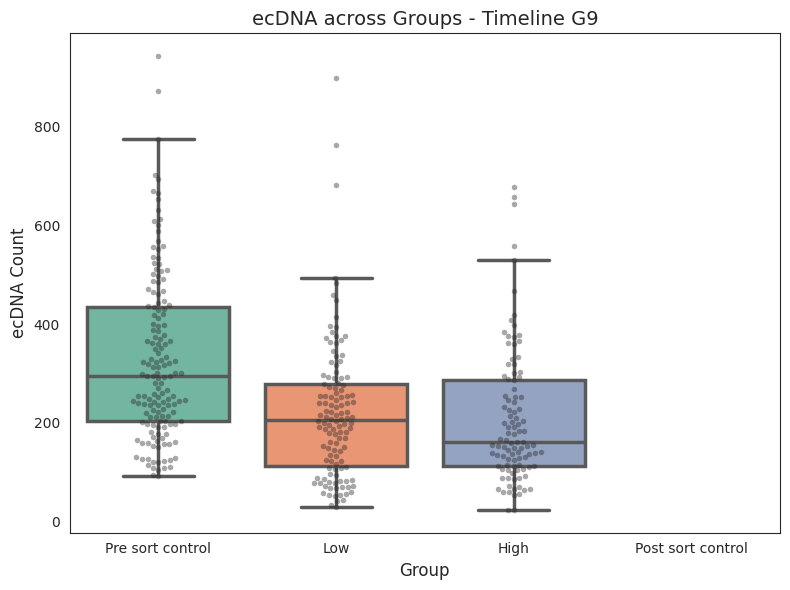

In [12]:
for timeline in timeline_order:
    plt.figure(figsize=(8,6))
    subset = df[df['Timeline'] == timeline]
    
    # Boxplot (main visualization)
    sns.boxplot(x="Group", y="ecDNA", data=subset, 
                order=group_order, palette="Set2",
                fliersize=0, linewidth=2.5)  # Remove outliers (dots), increase box outline
    
    # Swarmplot (points), smaller and transparent for clarity
    sns.swarmplot(x="Group", y="ecDNA", data=subset, 
                  order=group_order, color="0.15", 
                  size=4, alpha=0.4, dodge=True)  # Smaller, semi-transparent points
    
    # Statistical analysis (excluding Pre sort control)
    stat_subset = subset[subset['Group'] != 'Pre sort control']
    
    existing_groups = stat_subset['Group'].unique()
    data_groups = [stat_subset[stat_subset['Group'] == g]['ecDNA'] for g in existing_groups]
    
    if len(existing_groups) > 1:
        stat, p_kw = kruskal(*data_groups)

        if p_kw < 0.05:
            dunn_res = sp.posthoc_dunn(stat_subset, val_col='ecDNA', group_col='Group', p_adjust='bonferroni')

            combinations = list(itertools.combinations(existing_groups, 2))
            y_max = subset['ecDNA'].max()
            y_offset = y_max * 0.1

            for i, (g1, g2) in enumerate(combinations):
                p_val = dunn_res.loc[g1, g2]
                star = get_significance_symbol(p_val)  # Include 'ns'
                x1, x2 = group_order.index(g1), group_order.index(g2)
                y, h = y_max + y_offset + (i * y_offset), y_offset * 0.2

                plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)
        else:
            print(f"No overall significant differences at timeline {timeline}.")
    else:
        print(f"Not enough groups for statistical comparison at timeline {timeline}.")

    plt.title(f"ecDNA across Groups - Timeline {timeline}", fontsize=14)
    plt.ylabel("ecDNA Count", fontsize=12)
    plt.xlabel("Group", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"boxplot_groups_{timeline}.svg")
    plt.show()


### We create a comprehensive plot showing ecDNA counts across all groups and timelines, with "Pre sort control" included for reference.

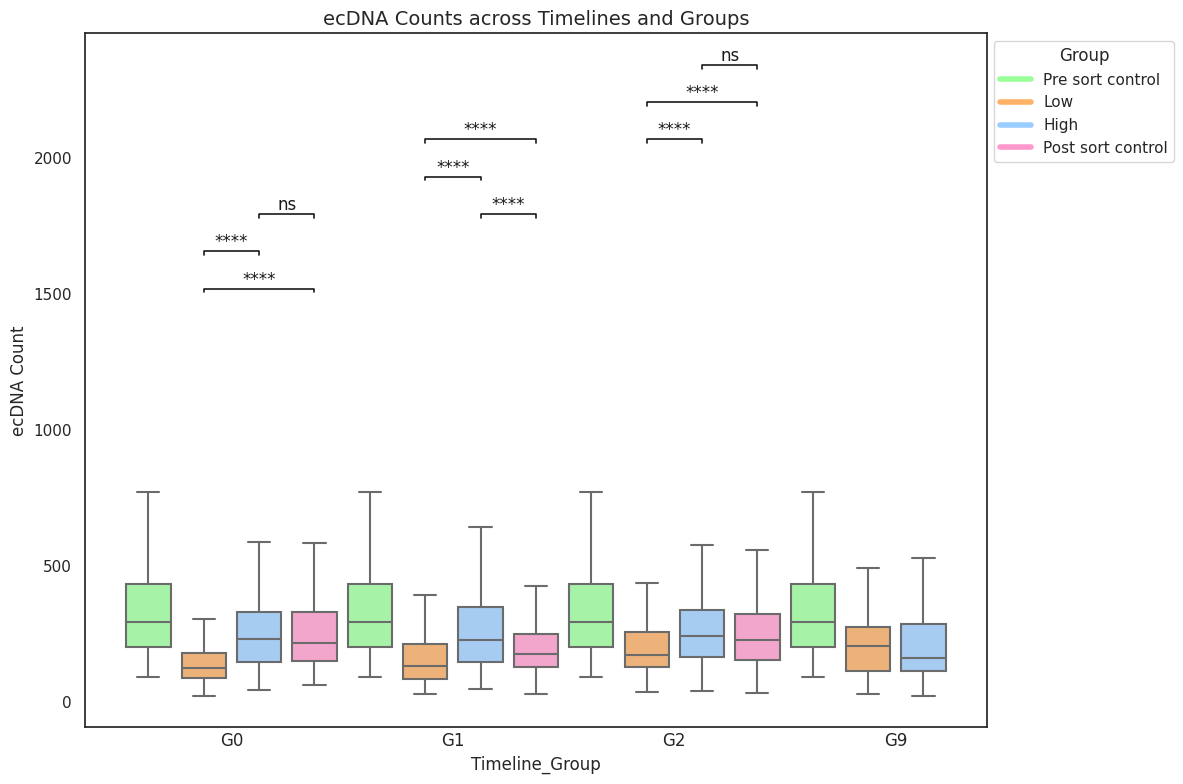

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for readability
sns.set(style="white")

# Create a combined category (Group + Timeline) for x-axis
df['Group_Timeline'] = df['Timeline'].astype(str) + '_' + df['Group'].astype(str)

# Define clear and custom order for x-axis labels
combined_order = [f"{tl}_{gp}" for tl in timeline_order for gp in group_order]

# Define consistent colors for each group
group_colors = {
    "Pre sort control": "#99ff99",  # green
    "Low": "#ffb266",  # Orange
    "High": "#99ccff",  # blue
    "Post sort control": "#ff99cc"  # Red
}

# Assign colors based on Group (ignoring timeline)
df['Color'] = df['Group'].map(group_colors)

plt.figure(figsize=(12, 8))

# Boxplot with consistent group-based coloring
sns.boxplot(
    x='Group_Timeline', y='ecDNA', data=df, 
    order=combined_order, palette=[group_colors[g.split("_")[1]] for g in combined_order],
    linewidth=1.5, fliersize=0
)

# Overlay swarmplot with smaller, transparent points
"""
sns.swarmplot(
    x='Group_Timeline', y='ecDNA', data=df, 
    order=combined_order, color='0.1', size=4, alpha=0.25
)"""

timeline_positions = []
for timeline in timeline_order:
    group_indices = [i for i, label in enumerate(combined_order) if label.startswith(timeline)]
    center_pos = np.mean(group_indices)  # Compute center of timeline
    timeline_positions.append(center_pos)

# Set x-ticks only at timeline centers
plt.xticks(timeline_positions, timeline_order, fontsize=12)

# Remove minor ticks (individual group labels)
plt.gca().tick_params(axis='x', which='both', length=0)

# Add x-axis label
plt.xlabel("Timeline", fontsize=14)

# Statistical annotation (between groups at each timeline)
# Find a fixed maximum height for all annotations
y_max = df['ecDNA'].max()
y_offset = y_max * 0.1

for idx, timeline in enumerate(timeline_order):
    stat_subset = df[(df["Timeline"] == timeline) & (df["Group"] != "Pre sort control")]
    existing_groups = stat_subset['Group'].unique()
    data_groups = [stat_subset[stat_subset['Group'] == g]['ecDNA'] for g in existing_groups]

    if len(existing_groups) > 1:
        stat, p_kw = kruskal(*data_groups)

        if p_kw < 0.05:
            dunn_res = sp.posthoc_dunn(stat_subset, val_col='ecDNA', group_col='Group', p_adjust='bonferroni')

            combinations = list(itertools.combinations(existing_groups, 2))

            for i, (g1, g2) in enumerate(combinations):
                p_val = dunn_res.loc[g1, g2]
                star = get_significance_symbol(p_val)

                x1 = combined_order.index(f"{timeline}_{g1}")
                x2 = combined_order.index(f"{timeline}_{g2}")
                y, h = y_max + y_offset + (idx * y_offset * 2) + (i * y_offset), y_offset * 0.1

                plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)



# Add legend for clarity
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in group_colors.values()]
labels = group_colors.keys()
plt.legend(handles, labels, title="Group", loc='upper left', bbox_to_anchor=(1, 1))

# Finalize plot aesthetics
plt.xlabel('Timeline_Group', fontsize=12)
plt.ylabel('ecDNA Count', fontsize=12)
plt.title('ecDNA Counts across Timelines and Groups', fontsize=14)
plt.tight_layout()

# Save high-quality SVG file for publication
plt.savefig('combined_ecDNA_all_groups_timelines_consistent_colors.svg', bbox_inches='tight')

plt.show()


### Kruskal-Wallis & Dunn's Test for Each Group (Instead of Each Timeline)


In [14]:
from scipy.stats import mannwhitneyu, kruskal
import itertools
import pandas as pd
import scikit_posthocs as sp

# Exclude Pre sort control from statistics
stat_df = df[df['Group'] != 'Pre sort control']

for group in group_order:
    print(f"\nGroup: {group}")
    subset = stat_df[stat_df['Group'] == group]
    timelines = subset['Timeline'].unique()
    
    if len(timelines) < 2:
        print(f"Skipping {group} (only one timeline present).")
        continue  # Skip if only one timeline exists
    
    data_timelines = [subset[subset['Timeline'] == t]['ecDNA'] for t in timelines]
    
    if len(timelines) > 2:
        # Use Kruskal-Wallis test when more than 2 timelines exist
        stat, p_kw = kruskal(*data_timelines)
        print(f"Kruskal-Wallis p-value for {group}: {p_kw}")

        if p_kw < 0.05:
            dunn_results = sp.posthoc_dunn(subset, val_col='ecDNA', group_col='Timeline', p_adjust='bonferroni')
            print(dunn_results)
            dunn_results.to_csv(f"dunn_timelines_{group}.csv")
        else:
            print(f"No significant differences found between timelines in {group}.")
    
    elif len(timelines) == 2:
        # Use Mann-Whitney U test when exactly 2 timelines exist
        t1, t2 = timelines
        data1 = subset[subset['Timeline'] == t1]['ecDNA']
        data2 = subset[subset['Timeline'] == t2]['ecDNA']
        
        stat, p_mw = mannwhitneyu(data1, data2, alternative='two-sided')
        print(f"Mann-Whitney U test for {group} ({t1} vs. {t2}): p-value = {p_mw}")

        # Save results to CSV
        results_df = pd.DataFrame({"Timeline1": [t1], "Timeline2": [t2], "p-value": [p_mw]})
        results_df.to_csv(f"mannwhitney_timelines_{group}.csv", index=False)



Group: Pre sort control
Skipping Pre sort control (only one timeline present).

Group: Low
Kruskal-Wallis p-value for Low: 5.967509991017533e-14
              G0        G1            G2            G9
G0  1.000000e+00  1.000000  2.011907e-10  8.194982e-08
G1  1.000000e+00  1.000000  1.930091e-06  3.258019e-05
G2  2.011907e-10  0.000002  1.000000e+00  1.000000e+00
G9  8.194982e-08  0.000033  1.000000e+00  1.000000e+00

Group: High
Kruskal-Wallis p-value for High: 0.0005487683127070826
          G0        G1        G2        G9
G0  1.000000  1.000000  1.000000  0.001602
G1  1.000000  1.000000  1.000000  0.002269
G2  1.000000  1.000000  1.000000  0.000357
G9  0.001602  0.002269  0.000357  1.000000

Group: Post sort control
Kruskal-Wallis p-value for Post sort control: 3.3428268769597786e-07
          G0        G1        G2
G0  1.000000  0.000011  1.000000
G1  0.000011  1.000000  0.000004
G2  1.000000  0.000004  1.000000


No overall significant differences in Pre sort control across timelines.


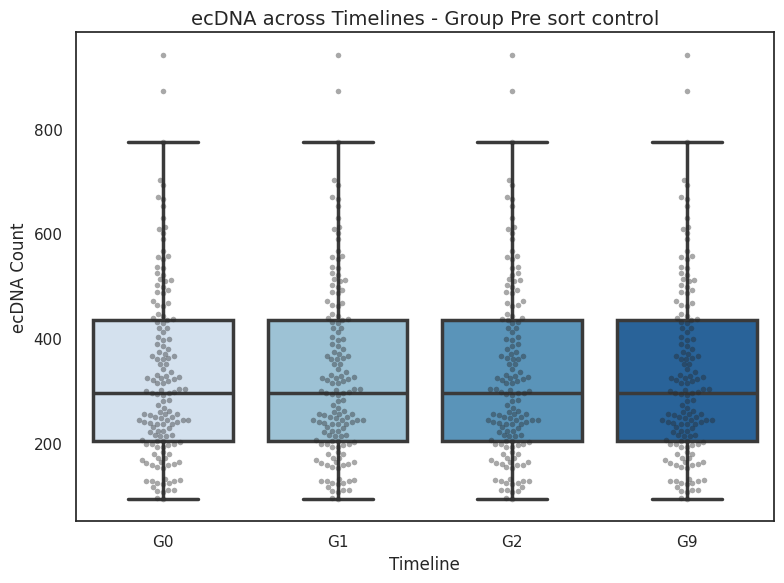

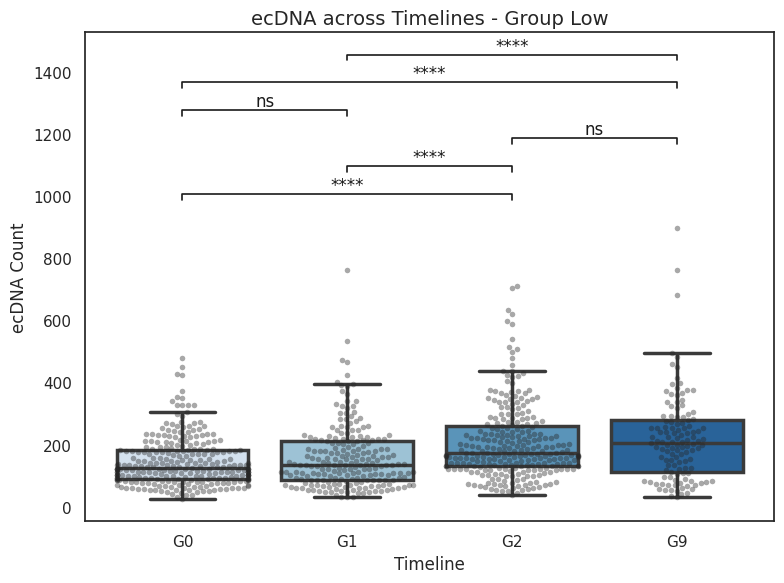

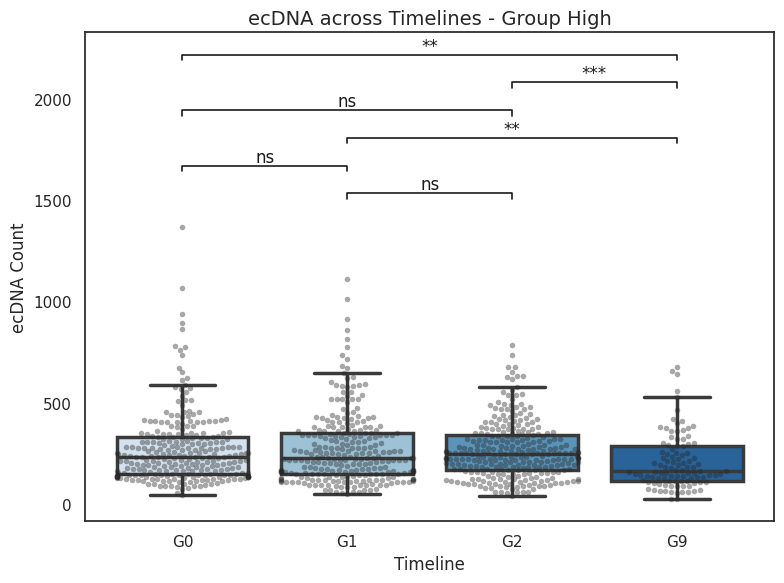

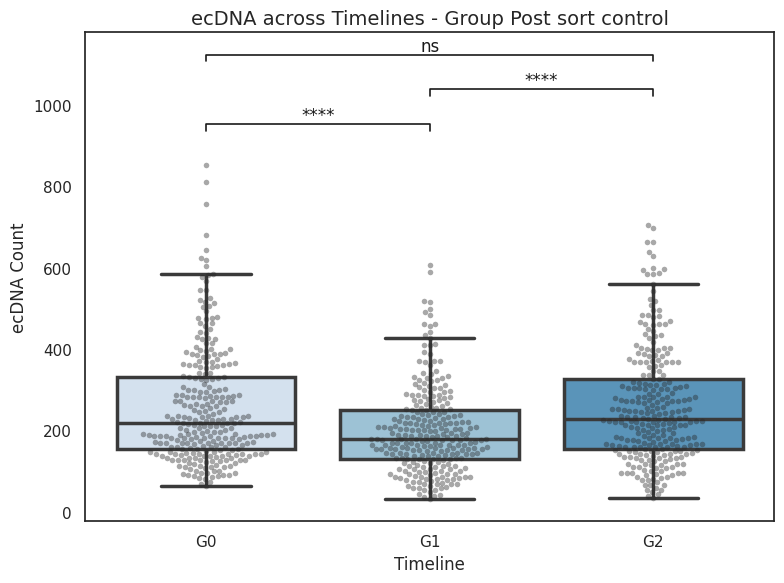

In [15]:
for group in group_order:
    plt.figure(figsize=(8,6))
    subset = df[df['Group'] == group]  # Select data for a single group
    
    # Generate a sequential blue palette with as many colors as needed
    sequential_palette = sns.color_palette("Blues", n_colors=len(timeline_order))

    # Boxplot (main visualization)
    sns.boxplot(x="Timeline", y="ecDNA", data=subset, 
                order=timeline_order, palette=sequential_palette,
                fliersize=0, linewidth=2.5)  # Remove outliers (dots), increase box outline
    
    # Swarmplot (points), smaller and transparent for clarity
    sns.swarmplot(x="Timeline", y="ecDNA", data=subset, 
                  order=timeline_order, color="0.15", 
                  size=4, alpha=0.4, dodge=True)  # Smaller, semi-transparent points
    
    # Statistical analysis (excluding Pre sort control)
    stat_subset = subset[subset['Timeline'] != 'Pre sort control']
    
    existing_timelines = stat_subset['Timeline'].unique()
    data_timelines = [stat_subset[stat_subset['Timeline'] == t]['ecDNA'] for t in existing_timelines]
    
    if len(existing_timelines) > 2:
        # Use Kruskal-Wallis test when more than 2 timelines exist
        stat, p_kw = kruskal(*data_timelines)

        if p_kw < 0.05:
            dunn_res = sp.posthoc_dunn(stat_subset, val_col='ecDNA', group_col='Timeline', p_adjust='bonferroni')

            combinations = list(itertools.combinations(existing_timelines, 2))
            y_max = subset['ecDNA'].max()
            y_offset = y_max * 0.1

            for i, (t1, t2) in enumerate(combinations):
                p_val = dunn_res.loc[t1, t2]
                star = get_significance_symbol(p_val)  # Include 'ns'
                x1, x2 = timeline_order.index(t1), timeline_order.index(t2)
                y, h = y_max + y_offset + (i * y_offset), y_offset * 0.2

                plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)
        else:
            print(f"No overall significant differences in {group} across timelines.")
    
    elif len(existing_timelines) == 2:
        # Use Mann-Whitney U test when exactly 2 timelines exist
        t1, t2 = existing_timelines
        data1 = stat_subset[stat_subset['Timeline'] == t1]['ecDNA']
        data2 = stat_subset[stat_subset['Timeline'] == t2]['ecDNA']
        
        stat, p_mw = mannwhitneyu(data1, data2, alternative='two-sided')
        star = get_significance_symbol(p_mw)

        # Annotate significance for two-group comparison
        x1, x2 = timeline_order.index(t1), timeline_order.index(t2)
        y_max = subset['ecDNA'].max()
        y_offset = y_max * 0.1
        y, h = y_max + y_offset, y_offset * 0.2

        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)

        print(f"Mann-Whitney U test for {group} ({t1} vs. {t2}): p-value = {p_mw}")

    else:
        print(f"Not enough timelines for statistical comparison in {group}.")

    plt.title(f"ecDNA across Timelines - Group {group}", fontsize=14)
    plt.ylabel("ecDNA Count", fontsize=12)
    plt.xlabel("Timeline", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"boxplot_timelines_{group}.svg")
    plt.show()


### 8. Optional: Combined Boxplot Across Timelines and Groups

##### Here we create a combined plot that shows ecDNA counts for each (Group, Timeline) pair.
##### We create a new combined category to control the x-axis order and color the boxes by Group.


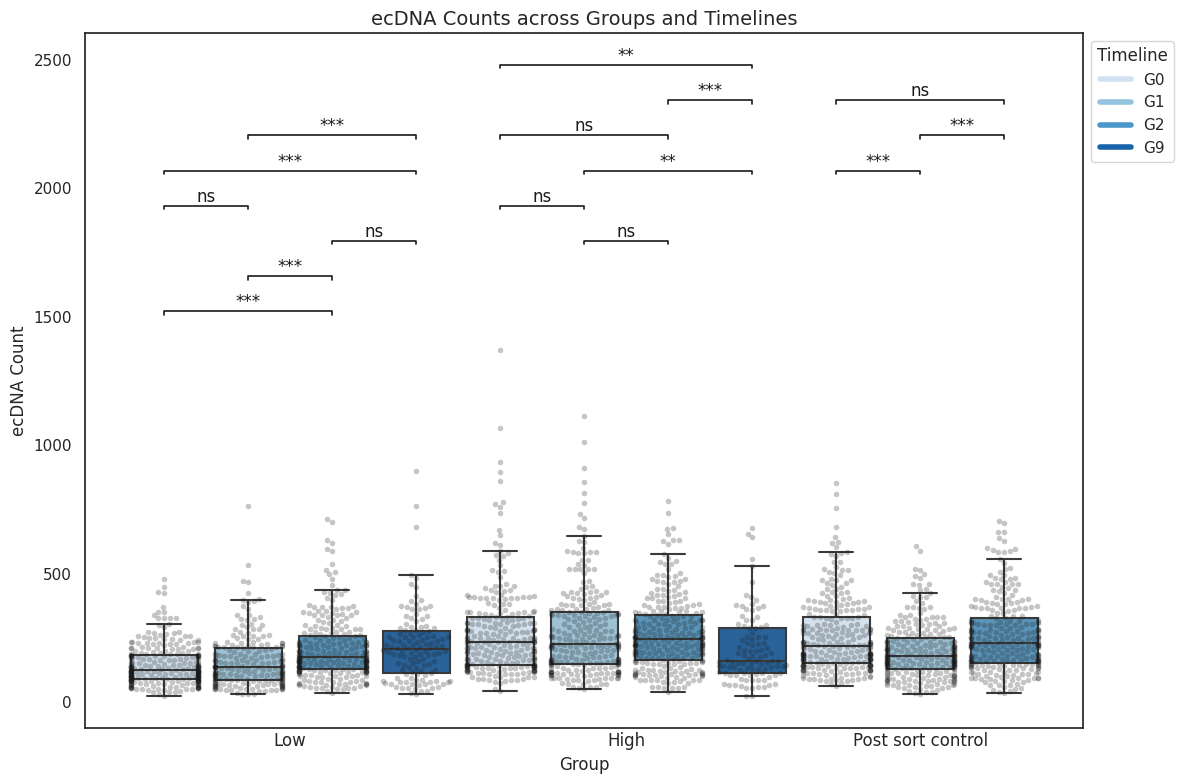

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.stats import kruskal, mannwhitneyu
import scikit_posthocs as sp  # make sure you have scikit-posthocs installed

# Define a helper function for significance annotation.
def get_significance_symbol(p_val):
    if p_val < 0.001:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return 'ns'

# Example order definitions; update these lists as needed.
group_order = ['Low', 'High', 'Post sort control']  # Replace with your actual group names.
timeline_order = ['G0', 'G1', 'G2', 'G9']           # Replace with your timeline labels.

# Reset index in case your DataFrame has a MultiIndex or unwanted index columns.
df = df.reset_index(drop=True)

# Ensure the Timeline column is a standard string type.
df['Timeline'] = df['Timeline'].astype(str)

# Generate a sequential palette (blue gradient) for timelines.
sequential_palette = sns.color_palette("Blues", n_colors=len(timeline_order))
sequential_timeline_colors = {tl: sequential_palette[i] for i, tl in enumerate(timeline_order)}

# Optionally, create a Color column in the DataFrame.
df['Color'] = df['Timeline'].map(sequential_timeline_colors)

# Create a combined category for the x-axis (Group_Timeline).
df['Timeline_Group'] = df['Group'].astype(str) + '_' + df['Timeline'].astype(str)

# Define the full combined order (all possible Group_Timeline combinations).
full_combined_order = [f"{gp}_{tl}" for gp in group_order for tl in timeline_order]
# Filter out categories that are not present in the data.
combined_order = [cat for cat in full_combined_order if cat in df['Timeline_Group'].unique()]

plt.figure(figsize=(12, 8))

# Create a boxplot using the sequential colors.
sns.boxplot(
    x='Timeline_Group',
    y='ecDNA',
    data=df,
    order=combined_order,
    # For each combined label, split and use the corresponding timeline color.
    palette=[sequential_timeline_colors[g.split("_")[1]] for g in combined_order],
    linewidth=1.5,
    fliersize=0
)

# Overlay a swarmplot with semi-transparent points.
sns.swarmplot(
    x='Timeline_Group',
    y='ecDNA',
    data=df,
    order=combined_order,
    color='0.1',
    size=4,
    alpha=0.25
)

# Adjust x-ticks: center only the Group names among their timelines.
group_positions = []
for group in group_order:
    # Find all combined categories starting with the current group.
    group_cats = [cat for cat in combined_order if cat.startswith(group)]
    if group_cats:  # Only proceed if there are categories for this group.
        indices = [combined_order.index(cat) for cat in group_cats]
        center_pos = np.mean(indices)
        group_positions.append(center_pos)

plt.xticks(group_positions, group_order, fontsize=12)
plt.gca().tick_params(axis='x', which='both', length=0)
plt.xlabel("Group", fontsize=14)

# Define parameters for statistical annotations.
y_max = df['ecDNA'].max()
y_offset = y_max * 0.1

# Loop through each group to add statistical annotations.
for idx, group in enumerate(group_order):
    # Exclude a potential control if necessary.
    stat_subset = df[(df["Group"] == group) & (df["Timeline"] != "Pre sort control")]
    existing_timelines = stat_subset['Timeline'].unique()
    data_timelines = [stat_subset[stat_subset['Timeline'] == t]['ecDNA'] for t in existing_timelines]

    if len(existing_timelines) > 2:
        # Use Kruskal-Wallis test if more than 2 timelines exist.
        stat, p_kw = kruskal(*data_timelines)
        if p_kw < 0.05:
            dunn_res = sp.posthoc_dunn(stat_subset, val_col='ecDNA', group_col='Timeline', p_adjust='bonferroni')
            combinations = list(itertools.combinations(existing_timelines, 2))
            for i, (t1, t2) in enumerate(combinations):
                p_val = dunn_res.loc[t1, t2]
                star = get_significance_symbol(p_val)
                label1 = f"{group}_{t1}"
                label2 = f"{group}_{t2}"
                # Only annotate if both categories exist in the filtered order.
                if label1 in combined_order and label2 in combined_order:
                    x1 = combined_order.index(label1)
                    x2 = combined_order.index(label2)
                    y, h = y_max + y_offset + (idx * y_offset * 2) + (i * y_offset), y_offset * 0.1
                    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                    plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)
    elif len(existing_timelines) == 2:
        # Use Mann-Whitney U test if exactly 2 timelines exist.
        t1, t2 = existing_timelines
        data1 = stat_subset[stat_subset['Timeline'] == t1]['ecDNA']
        data2 = stat_subset[stat_subset['Timeline'] == t2]['ecDNA']
        stat, p_mw = mannwhitneyu(data1, data2, alternative='two-sided')
        star = get_significance_symbol(p_mw)
        label1 = f"{group}_{t1}"
        label2 = f"{group}_{t2}"
        if label1 in combined_order and label2 in combined_order:
            x1, x2 = combined_order.index(label1), combined_order.index(label2)
            y, h = y_max + y_offset, y_offset * 0.1
            plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
            plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)
            print(f"Mann-Whitney U test for {group} ({t1} vs. {t2}): p-value = {p_mw}")

# Create a legend to map timelines to their sequential colors.
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in sequential_timeline_colors.values()]
labels = list(sequential_timeline_colors.keys())
plt.legend(handles, labels, title="Timeline", loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Group', fontsize=12)
plt.ylabel('ecDNA Count', fontsize=12)
plt.title('ecDNA Counts across Groups and Timelines', fontsize=14)
plt.tight_layout()

plt.savefig('combined_ecDNA_all_timelines_groups.svg', bbox_inches='tight')
plt.show()


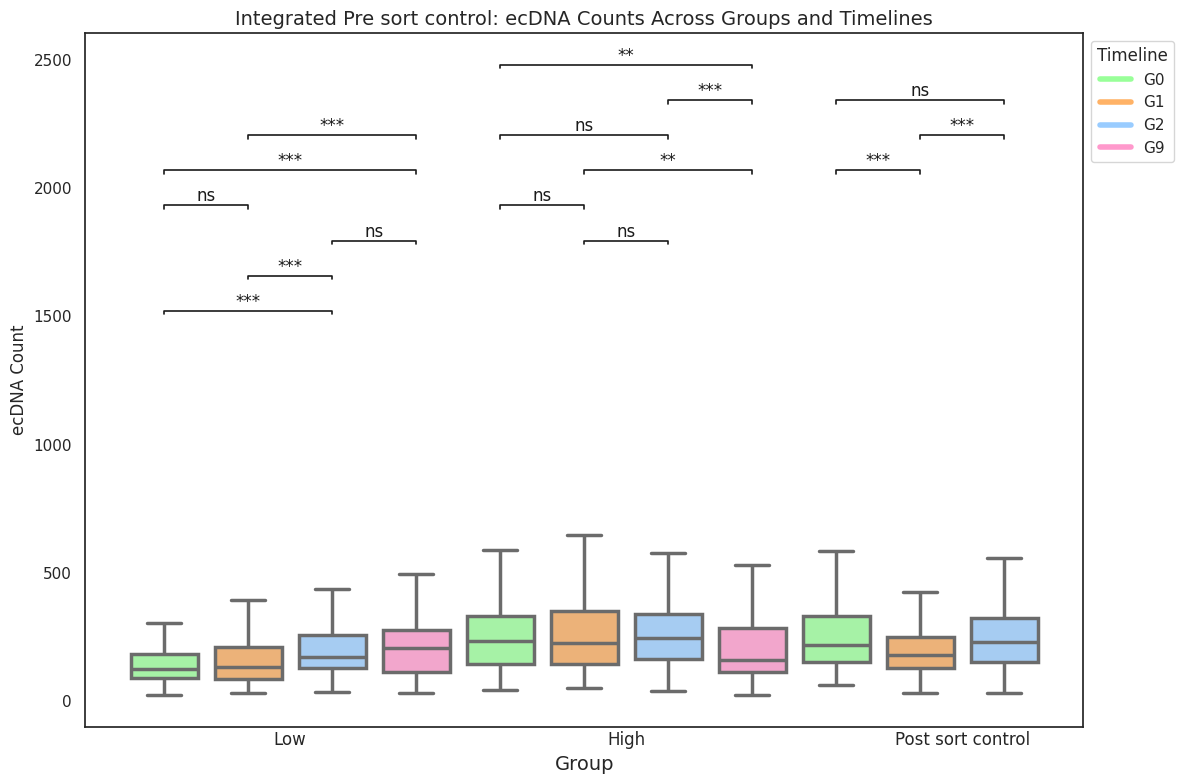

In [22]:
# Create a new column that integrates Pre sort control with its respective groups
df['Adjusted_Group'] = df['Group'].replace({'Pre sort control': 'Integrated Pre sort control'})


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.stats import kruskal, mannwhitneyu

# Set style for readability
sns.set(style="white")

# Create a new combined category for x-axis (Group + Timeline)
df['Timeline_Group'] = df['Adjusted_Group'].astype(str) + '_' + df['Timeline'].astype(str)

# Define new order for x-axis (Pre sort Control will now be within each group)
combined_order = [f"{gp}_{tl}" for gp in group_order if gp != "Pre sort control" for tl in timeline_order]

# Define colors for each timeline
timeline_colors = {
    "G0": "#99ff99",  # Green
    "G1": "#ffb266",  # Orange
    "G2": "#99ccff",  # Blue
    "G9": "#ff99cc"   # Red
}

# Assign colors based on Timeline
df['Color'] = df['Timeline'].map(timeline_colors)

plt.figure(figsize=(12, 8))

# Boxplot with timeline-based coloring
sns.boxplot(
    x='Timeline_Group', y='ecDNA', data=df, 
    order=combined_order, palette=[timeline_colors[g.split("_")[1]] for g in combined_order],
    linewidth=2.5, fliersize=0
)

# Swarmplot overlay
"""
sns.swarmplot(
    x='Timeline_Group', y='ecDNA', data=df, 
    order=combined_order, color='0.1', size=5, alpha=0.25
)
"""
# Adjust x-axis labels to show only Groups
group_positions = []
for group in group_order:
    if group == "Pre sort control":
        continue  # Skip standalone Pre sort control
    timeline_indices = [i for i, label in enumerate(combined_order) if label.startswith(group)]
    center_pos = np.mean(timeline_indices)
    group_positions.append(center_pos)

# Set x-ticks only at group centers
plt.xticks(group_positions, [g for g in group_order if g != "Pre sort control"], fontsize=12)

# Remove minor ticks
plt.gca().tick_params(axis='x', which='both', length=0)

# Label axes
plt.xlabel("Group", fontsize=14)
plt.ylabel("ecDNA Count", fontsize=12)
plt.title("Integrated Pre sort control: ecDNA Counts Across Groups and Timelines", fontsize=14)

# Statistical annotation (timeline comparisons inside each group)
y_max = df['ecDNA'].max()
y_offset = y_max * 0.1

for idx, group in enumerate(group_order):
    if group == "Pre sort control":
        continue  # Skip standalone Pre sort control

    stat_subset = df[(df["Adjusted_Group"] == group) & (df["Timeline"] != "Pre sort control")]
    existing_timelines = stat_subset['Timeline'].unique()
    data_timelines = [stat_subset[stat_subset['Timeline'] == t]['ecDNA'] for t in existing_timelines]

    if len(existing_timelines) > 2:
        # Kruskal-Wallis Test for multiple timelines
        stat, p_kw = kruskal(*data_timelines)

        if p_kw < 0.05:
            dunn_res = sp.posthoc_dunn(stat_subset, val_col='ecDNA', group_col='Timeline', p_adjust='bonferroni')

            combinations = list(itertools.combinations(existing_timelines, 2))

            for i, (t1, t2) in enumerate(combinations):
                p_val = dunn_res.loc[t1, t2]
                star = get_significance_symbol(p_val)

                x1 = combined_order.index(f"{group}_{t1}")
                x2 = combined_order.index(f"{group}_{t2}")
                y, h = y_max + y_offset + (idx * y_offset * 2) + (i * y_offset), y_offset * 0.1

                plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)

    elif len(existing_timelines) == 2:
        # Mann-Whitney U test if exactly two timelines exist
        t1, t2 = existing_timelines
        data1 = stat_subset[stat_subset['Timeline'] == t1]['ecDNA']
        data2 = stat_subset[stat_subset['Timeline'] == t2]['ecDNA']

        stat, p_mw = mannwhitneyu(data1, data2, alternative='two-sided')
        star = get_significance_symbol(p_mw)

        # Annotate significance for two-group comparison
        x1, x2 = combined_order.index(f"{group}_{t1}"), combined_order.index(f"{group}_{t2}")
        y, h = y_max + y_offset, y_offset * 0.1

        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)

        print(f"Mann-Whitney U test for {group} ({t1} vs. {t2}): p-value = {p_mw}")

# Add legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in timeline_colors.values()]
labels = timeline_colors.keys()
plt.legend(handles, labels, title="Timeline", loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure
plt.tight_layout()
plt.savefig('combined_ecDNA_all_timelines_groups_with_pre_sort.svg', bbox_inches='tight')

plt.show()


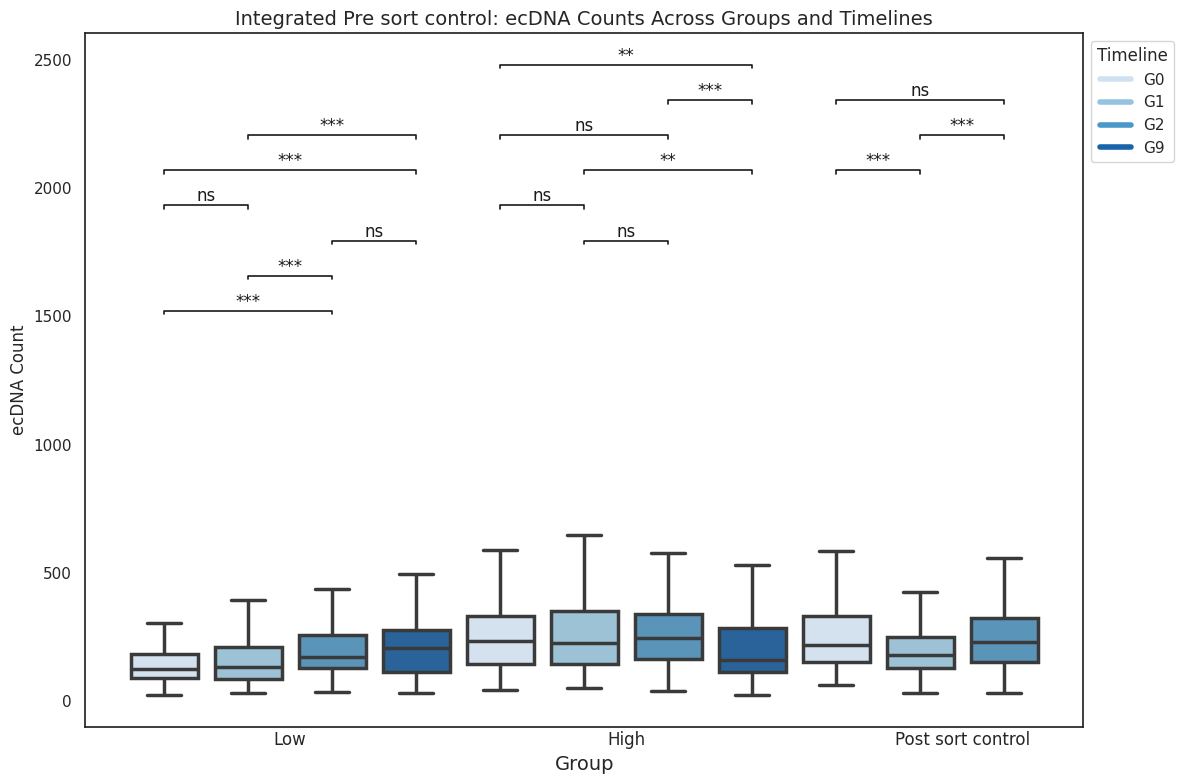

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.stats import kruskal, mannwhitneyu
import scikit_posthocs as sp  

# Define a helper function for significance annotation.
def get_significance_symbol(p_val):
    if p_val < 0.001:
        return '***'
    elif p_val < 0.01:
        return '**'
    elif p_val < 0.05:
        return '*'
    else:
        return 'ns'

# Example order definitions; update these lists as needed.
group_order = ['Low', 'High', 'Post sort control']  # Replace with your actual group names.
timeline_order = ['G0', 'G1', 'G2', 'G9']           # Replace with your timeline labels.

# Create a new column that integrates Pre sort control with its respective groups.
df['Adjusted_Group'] = df['Group'].replace({'Pre sort control': 'Integrated Pre sort control'})

# Reset index to avoid extra index columns.
df = df.reset_index(drop=True)

# Create a new combined category for the x-axis (Adjusted_Group + Timeline).
df['Timeline_Group'] = df['Adjusted_Group'].astype(str) + '_' + df['Timeline'].astype(str)

# Define the combined order for x-axis (excluding standalone Pre sort control).
combined_order = [f"{gp}_{tl}" for gp in group_order if gp != "Pre sort control" for tl in timeline_order]

# Generate a sequential palette (e.g., a blue gradient) for timelines.
sequential_palette = sns.color_palette("Blues", n_colors=len(timeline_order))
sequential_timeline_colors = {tl: sequential_palette[i] for i, tl in enumerate(timeline_order)}

# Assign sequential colors based on Timeline.
df['Color'] = df['Timeline'].map(sequential_timeline_colors)

plt.figure(figsize=(12, 8))

# Create a boxplot using the sequential timeline-based colors.
sns.boxplot(
    x='Timeline_Group', 
    y='ecDNA', 
    data=df, 
    order=combined_order, 
    palette=[sequential_timeline_colors[g.split("_")[1]] for g in combined_order],
    linewidth=2.5, 
    fliersize=0
)

# (Optional) Swarmplot overlay can be added if desired.
# sns.swarmplot(
#     x='Timeline_Group', 
#     y='ecDNA', 
#     data=df, 
#     order=combined_order, 
#     color='0.1', 
#     size=5, 
#     alpha=0.25
# )

# Adjust x-axis labels to show only Group names.
group_positions = []
for group in group_order:
    if group == "Pre sort control":
        continue  # Skip standalone Pre sort control.
    timeline_indices = [i for i, label in enumerate(combined_order) if label.startswith(group)]
    center_pos = np.mean(timeline_indices)
    group_positions.append(center_pos)

plt.xticks(group_positions, [g for g in group_order if g != "Pre sort control"], fontsize=12)
plt.gca().tick_params(axis='x', which='both', length=0)
plt.xlabel("Group", fontsize=14)
plt.ylabel("ecDNA Count", fontsize=12)
plt.title("Integrated Pre sort control: ecDNA Counts Across Groups and Timelines", fontsize=14)

# Define parameters for statistical annotations.
y_max = df['ecDNA'].max()
y_offset = y_max * 0.1

# Loop through each group to add statistical annotations.
for idx, group in enumerate(group_order):
    if group == "Pre sort control":
        continue  # Skip standalone Pre sort control.
    stat_subset = df[(df["Adjusted_Group"] == group) & (df["Timeline"] != "Pre sort control")]
    existing_timelines = stat_subset['Timeline'].unique()
    data_timelines = [stat_subset[stat_subset['Timeline'] == t]['ecDNA'] for t in existing_timelines]

    if len(existing_timelines) > 2:
        # Kruskal-Wallis Test for multiple timelines.
        stat, p_kw = kruskal(*data_timelines)
        if p_kw < 0.05:
            dunn_res = sp.posthoc_dunn(stat_subset, val_col='ecDNA', group_col='Timeline', p_adjust='bonferroni')
            combinations = list(itertools.combinations(existing_timelines, 2))
            for i, (t1, t2) in enumerate(combinations):
                p_val = dunn_res.loc[t1, t2]
                star = get_significance_symbol(p_val)
                x1 = combined_order.index(f"{group}_{t1}")
                x2 = combined_order.index(f"{group}_{t2}")
                y, h = y_max + y_offset + (idx * y_offset * 2) + (i * y_offset), y_offset * 0.1
                plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)
    elif len(existing_timelines) == 2:
        # Mann-Whitney U test if exactly two timelines exist.
        t1, t2 = existing_timelines
        data1 = stat_subset[stat_subset['Timeline'] == t1]['ecDNA']
        data2 = stat_subset[stat_subset['Timeline'] == t2]['ecDNA']
        stat, p_mw = mannwhitneyu(data1, data2, alternative='two-sided')
        star = get_significance_symbol(p_mw)
        x1, x2 = combined_order.index(f"{group}_{t1}"), combined_order.index(f"{group}_{t2}")
        y, h = y_max + y_offset, y_offset * 0.1
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        plt.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color="k", fontsize=12)
        print(f"Mann-Whitney U test for {group} ({t1} vs. {t2}): p-value = {p_mw}")

# Create a legend to map timelines to their sequential colors.
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in sequential_timeline_colors.values()]
labels = list(sequential_timeline_colors.keys())
plt.legend(handles, labels, title="Timeline", loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('combined_ecDNA_all_timelines_groups_with_pre_sort_sequential.svg', bbox_inches='tight')
plt.show()


### - **Groups Within Timelines**: 

Significant differences were observed in ecDNA counts among "Low", "High", and "Post sort control" at G0, G1, and G2 (p < 0.05), with "Low" consistently showing lower counts. No significant differences were found at G9, possibly due to smaller sample sizes or convergence of conditions.

### - **Timelines Within Groups**: 

The "Low" group showed increasing ecDNA counts over time (G0 to G9), with significant pairwise differences. The "High" and "Post sort control" groups exhibited more variability, with some significant changes across timelines.

### - **Implications**: 

These patterns suggest dynamic changes in ecDNA under different experimental conditions, warranting further investigation into the biological mechanisms driving these differences.

## Acknowledgment

**Use of AI-Based Code Generation and Editing Tools**  
This project was enhanced by the use of AI tools—ChatGPT, Grok, and Copilot—which played significant roles in improving the code, explanations, and overall presentation of the work.

### Specific Contributions

- **ChatGPT**:
  - Added comments to various functions to improve code readability and understanding.
  - Assisted in optimizing functions and replacing less effective ones, leading to better performance and results.
  - Provided clear, simplified explanations of complex concepts to make the content more accessible.
  - Edited text for grammatical accuracy, clarity, and an appropriate tone.

- **Grok**:
  - Contributed to adding comments to functions for better documentation.
  - Helped optimize functions and suggested replacements that improved the project’s outcomes.
  - Assisted in refining explanations to ensure they were concise and easy to understand.


All three tools—ChatGPT, Grok, and Copilot—were used to simplify explanations, making them clearer and more accessible. They also assisted in editing the grammar and tone of the text to improve readability and professionalism.

- **Iterative Refinement Process:**
For most parts of this project, I provided the same prompts to ChatGPT, Grok, and Copilot to compare their responses. I then asked each tool to evaluate the outputs of the others and provide feedback. This feedback was shared back with the tools, allowing them to refine their suggestions iteratively. This process ensured that the final code, explanations, and results were optimized for accuracy, clarity, and effectiveness.

### Citations

- OpenAI. (2023). ChatGPT (Version o3-mini-high for code and logics & Version 4.5 for text editing) Large language model. https://openai.com/chatgpt
- Grok (2023). xAI.(Version 3.0). Used for text generation and code refinement in this project. https://xai.com/grok
- Microsoft Copilot (an AI assistant developed by Microsoft),



